In [1]:
%%html
<audio src="https://henk.tech/colabkobold/silence.m4a" controls>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/aiffel/Main_quest/Main_Quest2/
# # %cd /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/aiffel/Main_quest/Main_Quest2


## 1. 이미지 전처리

In [10]:
# import os
# import cv2
# import re

# def crop_data(file_path):
#     result_image_list = []
#     result_label_list = []
#     add_threshld = 5

#     image_folder = os.path.join(file_path, 'PNG/Originals')
#     label_folder = os.path.join(file_path, 'PNG/Ground Truth')

#     image_list = []
#     label_list = []

#     # 이미지 파일 목록 가져오기
#     image_files = os.listdir(image_folder)
#     label_files = os.listdir(label_folder)

#     # 이미지 파일 정렬
#     image_files.sort(key=lambda x: int(re.findall('\d+', x)[0]))
#     label_files.sort(key=lambda x: int(re.findall('\d+', x)[0]))

#     for image_file, label_file in zip(image_files, label_files):
#         image_path = os.path.join(image_folder, image_file)
#         label_path = os.path.join(label_folder, label_file)

#         image = cv2.imread(image_path)
#         label = cv2.imread(label_path)

#         image_list.append(image)
#         label_list.append(label)

#     for image, label in zip(image_list, label_list):
#         # 이미지 상단 여백 제거
#         for h in range(image.shape[0]):
#             # print(h)
#             # print(image[h][int(image.shape[1] / 2)][0], image[0][0][0])
#             if (image[h][int(image.shape[1] / 2)][0] > image[0][0][0] + add_threshld) and\
#                 (image[h][int(image.shape[1] / 2)][1] > image[0][0][1] + add_threshld) and\
#                 (image[h][int(image.shape[1] / 2)][2] > image[0][0][2] + add_threshld):
#                 image = image[h:]
#                 label = label[h:]
#                 break

#         # 이미지 하단 여백 제거
#         for h in range(image.shape[0] - 1, 0, -1):
#             # print(h)
#             # print(image[h][int(image.shape[1] / 2)][0], image[0][0][0])
#             if (image[h][int(image.shape[1] / 2)][0] > image[0][0][0] + add_threshld) and\
#                 (image[h][int(image.shape[1] / 2)][1] > image[0][0][1] + add_threshld) and\
#                 (image[h][int(image.shape[1] / 2)][2] > image[0][0][2] + add_threshld):
#                 image = image[:h]
#                 label = label[:h]
#                 break

#         # 이미지 좌측 여백 제거
#         for w in range(image.shape[1]):
#             # print(w)
#             # print(image[int(image.shape[0] / 2)][w][0], image[0][0][0])
#             if (image[int(image.shape[0] / 2)][w][0] > image[0][0][0] + add_threshld) and\
#                 (image[int(image.shape[0] / 2)][w][1] > image[0][0][1] + add_threshld) and\
#                 (image[int(image.shape[0] / 2)][w][2] > image[0][0][2] + add_threshld):
#                 image = image[:, w:]
#                 label = label[:, w:]
#                 break

#         # 이미지 우측 여백 제거
#         for w in range(image.shape[1] - 1, 0, -1):
#             # print(w)
#             # print(image[int(image.shape[0] / 2)][w][0], image[0][0][0])
#             if (image[int(image.shape[0] / 2)][w][0] > image[0][0][0] + add_threshld) and\
#                 (image[int(image.shape[0] / 2)][w][1] > image[0][0][1] + add_threshld) and\
#                 (image[int(image.shape[0] / 2)][w][2] > image[0][0][2] + add_threshld):
#                 image = image[:, :w]
#                 label = label[:, :w]
#                 break

#         gray = cv2.cvtColor(label, cv2.COLOR_BGR2GRAY)
#         _, thresholded = cv2.threshold(gray, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#         result_image_list.append(image)
#         result_label_list.append(thresholded)

#     print(len(result_image_list))
#     print(len(result_label_list))

#     return result_image_list, result_label_list

In [11]:
# import os
# import cv2

# # 이미지 파일 폴더에 저장
# file_path = 'Polyp_segmentation/train'
# image_list, label_list = crop_data(file_path)

# output_path = 'new_train/new_images'
# os.makedirs(output_path, exist_ok=True)

# for i, image in enumerate(image_list):
#     output_filename = os.path.join(output_path, 'image_{}.png'.format(i))
#     cv2.imwrite(output_filename, image)

# output_path = 'new_train/new_labels'
# os.makedirs(output_path, exist_ok=True)

# for i, label in enumerate(label_list):
#     output_filename = os.path.join(output_path, 'label_{}.png'.format(i))
#     cv2.imwrite(output_filename, label)

# print("Images and labels saved successfully.")

612
612
Images and labels saved successfully.


In [ ]:
# import shutil

# # 폴더 압축하기
# folder_to_zip = 'new_train'
# output_zip_file = 'new_train'

# shutil.make_archive(output_zip_file, 'zip', folder_to_zip)

# print("Folder compressed successfully.")

Folder compressed successfully.


## 2. 데이터 전처리

### 이미지 Augmentation

In [4]:
# !unzip 'Polyp_segmentation.zip'

Archive:  Polyp_segmentation.zip
   creating: Polyp_segmentation/
  inflating: __MACOSX/._Polyp_segmentation  
  inflating: Polyp_segmentation/.DS_Store  
  inflating: __MACOSX/Polyp_segmentation/._.DS_Store  
   creating: Polyp_segmentation/test/
  inflating: __MACOSX/Polyp_segmentation/._test  
  inflating: Polyp_segmentation/README.md  
   creating: Polyp_segmentation/train/
  inflating: __MACOSX/Polyp_segmentation/._train  
  inflating: Polyp_segmentation/metadata.csv  
  inflating: __MACOSX/Polyp_segmentation/._metadata.csv  
  inflating: Polyp_segmentation/class_dict.csv  
  inflating: __MACOSX/Polyp_segmentation/._class_dict.csv  
  inflating: Polyp_segmentation/test/.DS_Store  
  inflating: __MACOSX/Polyp_segmentation/test/._.DS_Store  
   creating: Polyp_segmentation/test/images/
  inflating: __MACOSX/Polyp_segmentation/test/._images  
   creating: Polyp_segmentation/test/labels/
  inflating: __MACOSX/Polyp_segmentation/test/._labels  
   creating: Polyp_segmentation/train/TIF

In [1]:
from albumentations import Compose, HorizontalFlip, VerticalFlip, ColorJitter, Affine, Resize

def build_augmentation(is_train=True):
    if is_train:    # 훈련용 데이터일 경우
        return Compose([
                    HorizontalFlip(p=0.5),    # 50%의 확률로 좌우대칭
                    VerticalFlip(p=0.5),      # 50%의 확률로 상하대칭
                    ColorJitter(
                        brightness=(0.6, 1.6),    # 밝기를 0.6부터 1.6 사이에서 무작위로 조정
                        contrast=0.2,             # 대비를 0.2로 조정
                        saturation=0.1,           # 채도를 0.1로 조정
                        hue=0.01                  # 색조를 0.01로 조정
                    ),
                    Affine(
                        rotate=(-180, 180),    # -180도부터 180도 사이에서 무작위로 회전
                        translate_percent={"x": (-0.125, 0.125),
                                           "y": (-0.125, 0.125)},    # 좌우, 상하로 -0.125부터 0.125 사이에서 무작위로 이동
                        scale=(0.5, 1.5),      # 크기를 0.5부터 1.5 사이에서 무작위로 조정
                        shear=(-22.5, 22.5),   # -22.5부터 22.5 사이에서 무작위로 기울기 조정
                    ),
                    Resize(              # 입력이미지를 224X224로 resize
                        width=224,
                        height=224
                        )
                    ])
    return Compose([      # 테스트용 데이터일 경우에는 224X224로 resize만 수행합니다.
                Resize(
                    width=224,
                    height=224
                    )

                          ])

### Generator

In [2]:
from glob import glob
from skimage.io import imread
import math
import os
import tensorflow as tf
import numpy as np
import cv2

class DatasetGenerator(tf.keras.utils.Sequence):
    def __init__(self,
                dir_path,
                batch_size=16,
                img_size=(224, 224, 3),
                output_size=(224, 224),
                is_train=True,
                augmentation=None):
        self.dir_path = dir_path
        self.batch_size = batch_size
        self.is_train = is_train
        self.dir_path = dir_path
        self.augmentation = augmentation
        self.img_size = img_size
        self.output_size = output_size

        # load_dataset()을 통해서 kitti dataset의 directory path에서 라벨과 이미지를 확인합니다.
        self.data = self.load_dataset()

    def load_dataset(self):
        # kitti dataset에서 필요한 정보(이미지 경로 및 라벨)를 directory에서 확인하고 로드하는 함수입니다.
        # 이때 is_train에 따라 test set을 분리해서 load하도록 해야합니다.
        input_images = glob(os.path.join(self.dir_path, "new_images", "*.png"))
        label_images = glob(os.path.join(self.dir_path, "new_labels", "*.png"))
        input_images.sort()
        label_images.sort()
        assert len(input_images) == len(label_images)
        data = [ _ for _ in zip(input_images, label_images)]

        if self.is_train:
            return data[:-30]
        return data[-30:]

    def __len__(self):
        # Generator의 length로서 전체 dataset을 batch_size로 나누고 소숫점 첫째자리에서 올림한 값을 반환합니다.
        return math.ceil(len(self.data) / self.batch_size)

    def __getitem__(self, index):
        # 입력과 출력을 만듭니다.
        # 입력은 resize및 augmentation이 적용된 input image이고
        # 출력은 semantic label입니다.
        batch_data = self.data[
                            index*self.batch_size:
                            (index + 1)*self.batch_size
                            ]
        inputs = np.zeros([self.batch_size, *self.img_size])
        outputs = np.zeros([self.batch_size, *self.output_size])

        for i, data in enumerate(batch_data):
            input_img_path, output_path = data
            _input = imread(input_img_path)
            _output = imread(output_path, as_gray=True)
            _output = (_output==1).astype(np.uint8)*1
            data = {
                "image": _input,
                "mask": _output,
                }
            augmented = self.augmentation(**data)
            bgr = cv2.cvtColor(augmented["image"], cv2.COLOR_RGB2BGR)
            lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)
            l, a, b = cv2.split(lab)
            equalized_l = cv2.equalizeHist(l)
            lab = cv2.merge((equalized_l, a, b))
            bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
            rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
            inputs[i] = rgb/255
            outputs[i] = augmented["mask"]
            return inputs, outputs

    def on_epoch_end(self):
        # 한 epoch가 끝나면 실행되는 함수입니다. 학습중인 경우에 순서를 random shuffle하도록 적용한 것을 볼 수 있습니다.
        self.indexes = np.arange(len(self.data))
        if self.is_train == True :
            np.random.shuffle(self.indexes)
            return self.indexes

In [3]:
augmentation = build_augmentation()
test_preproc = build_augmentation(is_train=False)

dir_path = 'new_train'

train_generator = DatasetGenerator(
    dir_path,
    augmentation=augmentation,
    batch_size=4
)

test_generator = DatasetGenerator(
    dir_path,
    augmentation=test_preproc,
    is_train=False,
    batch_size=4
)

## 모델 불러오기

In [22]:
# !unzip 'DuckNet17-20230710T020740Z-001.zip'

In [4]:
import sys
# sys.path.append ("/content/drive/MyDrive/Module")
sys.path.append("/aiffel/aiffel/MainQuest/Module")
from DUCK_Net import *

In [ ]:
from tensorflow import keras
from DiceMetric import dice_metric_loss

model_path = 'DuckNet17'

# 모델 인스턴스 생성
loaded_model = keras.models.load_model(model_path, custom_objects={'dice_metric_loss': dice_metric_loss})

In [5]:
def calculate_iou_score(target, prediction):
    intersection = np.logical_and(target, prediction).sum()
    union = np.logical_or(target, prediction).sum()
    iou_score = (intersection / union).astype(np.float32)
#     print('IoU : %f' % iou_score )
    return iou_score

In [6]:
ducknet_model = create_model(224, 224, 3, 1, 32)

DUCK-Net 가동


In [12]:
from DiceMetric import dice_metric_loss
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import layers, Input
import pickle
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

lr = 5e-3
epoch = 100
model_path = f'pt_ducknet_model_rmsprop_{str(lr)}_{epoch}_2.h5'
history_path = f'pt_ducknet_history_rmsprop_{str(lr)}_{epoch}_2.h5'

early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True)

# 모델 컴파일
loaded_model.compile(optimizer=RMSprop(lr), loss=dice_metric_loss)

# 모델 훈련
pt_ducknet_history = loaded_model.fit(train_generator,
          validation_data=test_generator,
          steps_per_epoch=len(train_generator),
          epochs=epoch,
          callbacks=[early_stopping, model_checkpoint])

loaded_model.save(model_path)
with open(history_path, 'wb') as file:
    pickle.dump(pt_ducknet_history.history, file)

Epoch 1/100
146/146 [==============================] - 173s 843ms/step - loss: 0.6735 - val_loss: 0.9643


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
146/146 [==============================] - 117s 804ms/step - loss: 0.6346 - val_loss: 0.9634
Epoch 3/100
146/146 [==============================] - 118s 805ms/step - loss: 0.5973 - val_loss: 0.9636
Epoch 4/100
146/146 [==============================] - 117s 803ms/step - loss: 0.5958 - val_loss: 0.7778
Epoch 5/100
146/146 [==============================] - 117s 804ms/step - loss: 0.5814 - val_loss: 0.9631
Epoch 6/100
146/146 [==============================] - 117s 802ms/step - loss: 0.5578 - val_loss: 0.9426
Epoch 7/100
146/146 [==============================] - 117s 803ms/step - loss: 0.5556 - val_loss: 0.9572
Epoch 8/100
146/146 [==============================] - 117s 803ms/step - loss: 0.5454 - val_loss: 0.9614
Epoch 9/100
146/146 [==============================] - 117s 803ms/step - loss: 0.5331 - val_loss: 0.6930
Epoch 10/100
146/146 [==============================] - 117s 804ms/step - loss: 0.5047 - val_loss: 0.9614
Epoch 11/100
146/146 [==============================] 

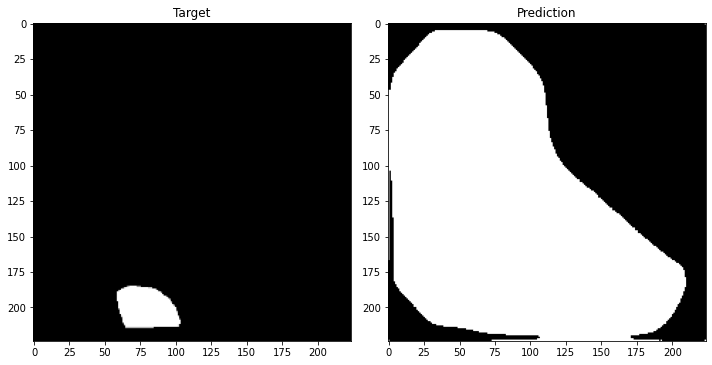

0.035685938


In [11]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from DiceMetric import dice_metric_loss

# lr = 1e-4
# epoch = 100
# model_path = f'pt_ducknet_model_rmsprop_{lr}_{epoch}.h5'
# # 학습된 모델 불러오기
# ducknet_model = tf.keras.models.load_model(
#     model_path,
#     custom_objects={'dice_metric_loss': dice_metric_loss})

index = 10
image_path=f'Polyp_segmentation/test/images/{index}.bmp'
origin_img = imread(image_path)
data = {"image":origin_img}
processed = test_preproc(**data)
bgr = cv2.cvtColor(processed["image"], cv2.COLOR_RGB2BGR)
lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
equalized_l = cv2.equalizeHist(l)
lab = cv2.merge((equalized_l, a, b))
bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
output = ducknet_model(np.expand_dims(rgb/255,axis=0))
output = (output[0].numpy() >= 0.5).astype(np.uint8).squeeze(-1)*255
prediction = output/255

label_path = f'Polyp_segmentation/test/labels/{index}.bmp'
label_img = imread(label_path, as_gray=True)
label_data = {"image":label_img}
label_processed = test_preproc(**label_data)
target = label_processed["image"].astype(np.uint8)
# target = cv2.resize(label_processed, (352, 352))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(target, cmap='gray')
axes[0].set_title('Target')

axes[1].imshow(prediction, cmap='gray')
axes[1].set_title('Prediction')

plt.tight_layout()
plt.show()

iou = calculate_iou_score(target, prediction)
print(iou)

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from DiceMetric import dice_metric_loss

# 학습된 모델 불러오기
# ducknet_model = tf.keras.models.load_model(
#     'model1.h5',
#     custom_objects={'dice_metric_loss': dice_metric_loss})

iou = 0.0
for i in range(300):
    image_path=f'Polyp_segmentation/test/images/{i + 1}.bmp'
    origin_img = imread(image_path)
    data = {"image":origin_img}
    processed = test_preproc(**data)
    bgr = cv2.cvtColor(processed["image"], cv2.COLOR_RGB2BGR)
    lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    equalized_l = cv2.equalizeHist(l)
    lab = cv2.merge((equalized_l, a, b))
    bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    output = ducknet_model(np.expand_dims(rgb/255,axis=0))
    output = (output[0].numpy()>=0.5).astype(np.uint8).squeeze(-1)*255 #hreshold를 변경하면 도로인식 결과범위가 달라집니다.
    prediction = output/255 # 도로로 판단한 영역

    label_path = f'Polyp_segmentation/test/labels/{i + 1}.bmp'
    label_img = imread(label_path, as_gray=True)
    label_data = {"image":label_img}
    label_processed = test_preproc(**label_data)
    target = ducknet_model["image"].astype(np.uint8)

    # plt.imshow(target)
    # plt.imshow(predictions[0])

    iou += calculate_iou_score(target, prediction)

print(iou / 300.0)

In [23]:
ducknet_model = create_model(224, 224, 3, 1, 32)

DUCK-Net 가동


## 모델 훈련하기

In [40]:
import gc
gc.collect()

1480453

In [45]:
from DiceMetric import dice_metric_loss
from tensorflow.keras.optimizers import Adam, RMSprop
import pickle

lr = 5e-3
epoch = 100
model_path = f'ducknet_model_rmsprop_{lr}_{epoch}.h5'
history_path = f'ducknet_history_rmsprop_{lr}_{epoch}.h5'

# 모델 컴파일
ducknet_model.compile(optimizer=RMSprop(lr), loss=dice_metric_loss)

# 모델 훈련
ducknet_history = ducknet_model.fit(train_generator,
          validation_data=test_generator,
          steps_per_epoch=len(train_generator),
          epochs=epoch)

ducknet_model.save(model_path)
with open(history_path, 'wb') as file:
    pickle.dump(ducknet_history.history, file)

Epoch 1/100
73/73 [==============================] - 162s 2s/step - loss: 0.3701 - val_loss: 0.5069
Epoch 2/100
73/73 [==============================] - 105s 1s/step - loss: 0.3650 - val_loss: 0.6795
Epoch 3/100
73/73 [==============================] - 105s 1s/step - loss: 0.3444 - val_loss: 0.7786
Epoch 4/100
73/73 [==============================] - 105s 1s/step - loss: 0.3352 - val_loss: 0.9749
Epoch 5/100
73/73 [==============================] - 105s 1s/step - loss: 0.3554 - val_loss: 0.6815
Epoch 6/100
73/73 [==============================] - 105s 1s/step - loss: 0.3514 - val_loss: 0.7795
Epoch 7/100
73/73 [==============================] - 105s 1s/step - loss: 0.3316 - val_loss: 0.7819
Epoch 8/100
73/73 [==============================] - 105s 1s/step - loss: 0.3447 - val_loss: 0.5488
Epoch 9/100
73/73 [==============================] - 105s 1s/step - loss: 0.3242 - val_loss: 0.7277
Epoch 10/100
73/73 [==============================] - 105s 1s/step - loss: 0.3065 - val_loss: 0.6823

/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [33]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from DiceMetric import dice_metric_loss

# lr = 5e-3
# epoch = 100
# model_path = f'ducknet_model_rmsprop_{lr}_{epoch}'
# # 학습된 모델 불러오기
# ducknet_model = tf.keras.models.load_model(
#     model_path,
#     custom_objects={'dice_metric_loss': dice_metric_loss})

image_path=f'Polyp_segmentation/test/images/1.bmp'
origin_img = imread(image_path)
data = {"image":origin_img}
processed = test_preproc(**data)
output = ducknet_model(np.expand_dims(processed["image"]/255,axis=0))
output = (output[0].numpy()>=0.5).astype(np.uint8).squeeze(-1)*255 #hreshold를 변경하면 도로인식 결과범위가 달라집니다.
prediction = output/255 # 도로로 판단한 영역

label_path = f'Polyp_segmentation/test/labels/1.bmp'
label_img = imread(label_path, as_gray=True)
label_data = {"image":label_img}
label_processed = test_preproc(**label_data)
target = label_processed["image"].astype(np.uint8)
# target = cv2.resize(label_processed, (352, 352))

# plt.imshow(target)
# plt.imshow(predictions[0])

iou = calculate_iou_score(target, prediction)
print(iou)

0.0


In [25]:
def calculate_iou_score(target, prediction):
    intersection = np.logical_and(target, prediction).sum()
    union = np.logical_or(target, prediction).sum()
    iou_score = (intersection / union).astype(np.float32)
#     print('IoU : %f' % iou_score )
    return iou_score

In [26]:
iou = calculate_iou_score(target, predictions)
print(iou)

0.0


In [ ]:
import matplotlib.pyplot as plt

num_images = 5  # 시각화할 이미지 수

dir_path = 'Polyp_segmentation/test'

for i in range(1, num_images + 1):
    image_path = dir_path + f'/images/{str(i)}.bmp'
    label_path = dir_path + f'/labels/{str(i)}.bmp'

    # unet_model 예측 결과 얻기
    unet_output, unet_prediction, unet_target = get_output(
        unet_model,
        test_preproc,
        image_path=image_path,
        output_path=dir_path + f'./unet_result_{str(i).zfill(3)}.png',
        label_path=label_path
    )

    # unet_pp_model 예측 결과 얻기
    unet_pp_output, unet_pp_prediction, unet_pp_target = get_output(
        unet_pp_model,
        test_preproc,
        image_path=image_path,
        output_path=dir_path + f'./unet_pp_result_{str(i).zfill(3)}.png',
        label_path=label_path
    )

    # IOU 스코어 계산
    unet_iou = calculate_iou_score(unet_target, unet_prediction)
    unet_pp_iou = calculate_iou_score(unet_pp_target, unet_pp_prediction)

    # 이미지 결과 시각화
    fig, axes = plt.subplots(1, 2, figsize=(15, 10))

    # unet_model 결과
    axes[0].imshow(unet_output)
    axes[0].set_title("unet_model")
    axes[0].text(0, unet_output.height, f"IOU: {unet_iou:.4f}", color='white', backgroundcolor='black')

    # unet_pp_model 결과
    axes[1].imshow(unet_pp_output)
    axes[1].set_title("unet_pp_model")
    axes[1].text(0, unet_pp_output.height, f"IOU: {unet_pp_iou:.4f}", color='white', backgroundcolor='black')


    plt.show()

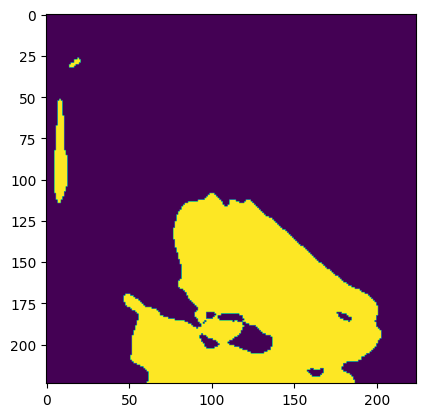

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from DiceMetric import dice_metric_loss

# 학습된 모델 불러오기
# ducknet_model = tf.keras.models.load_model(
#     'model1.h5',
#     custom_objects={'dice_metric_loss': dice_metric_loss})

image_path=f'polyp_segmentation/test/images/10.bmp'
origin_img = imread(image_path)
data = {"image":origin_img}
processed = test_preproc(**data)
# 모델에 이미지 전달하여 예측 수행
input_image = np.expand_dims(processed["image"] / 255, axis=0)  # 배치 차원 추가
predictions = model.predict(input_image)

# 예측 결과 후처리
binary_mask = predictions[0] == 1  # 이진화
binary_mask = binary_mask.astype(np.uint8) * 255  # 이진 마스크로 변환

# # 이진 마스크를 반투명하게 원본 이미지에 합성
# result = cv2.cvtColor(input_image, cv2.COLOR_RGB2BGR)  # 이미지 색상 공간 변환

# alpha = 0.5  # 반투명 정도 (0.0 ~ 1.0)
# result_with_mask = cv2.addWeighted(result, 1 - alpha, cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR), alpha, 0)

# 예측 결과 확인
plt.imshow(binary_mask)

In [ ]:
import gc
gc.collect()

95095

In [ ]:
from tensorflow.keras import backend as K
from keras.losses import binary_crossentropy

def dice_coef(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def bce_dice_loss(y_true, y_pred):
    return 0.5 * binary_crossentropy(y_true, y_pred) - dice_coef(y_true, y_pred)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, Concatenate, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def contracting_block(channels, inputs, dropout=False, maxpool=True):
    conv = Conv2D(channels, 3, padding='same')(inputs)
    conv = BatchNormalization()(conv)
    conv = Activation("relu")(conv)
    conv = Conv2D(channels, 3, padding='same')(conv)
    conv = BatchNormalization()(conv)
    conv = Activation("relu")(conv)
    if dropout:
        conv = Dropout(0.5)(conv)
    if maxpool:
        pool = MaxPooling2D((2, 2))(conv)
        return conv, pool
    return conv

def Expanding_block(channels, inputs, conv_list):
    up = Conv2DTranspose(channels, 2, strides=(2, 2), padding="same")(inputs)
    conv_list.append(up)
    merge = Concatenate(axis=-1)(conv_list)
    up = Conv2D(channels, 3, padding="same")(merge)
    up = BatchNormalization()(up)
    up = Activation("relu")(up)
    up = Conv2D(channels, 3, padding="same")(up)
    up = BatchNormalization()(up)
    up = Activation("relu")(up)
    return up

def unet_pp_build(input_shape=(224, 224, 3), deep_supervision=True):
    inputs = Input(input_shape)

    x0_0, pool1 = contracting_block(64, inputs)

    x1_0, pool2 = contracting_block(128, pool1)

    x2_0, pool3 = contracting_block(256, pool2)

    x3_0, pool4 = contracting_block(512, pool3, dropout=True)

    x4_0 = contracting_block(1024, pool4, dropout=True, maxpool=False)

    x3_1 = Expanding_block(512, x4_0, [x3_0])

    x2_1 = Expanding_block(256, x3_0, [x2_0])
    x2_2 = Expanding_block(256, x3_1, [x2_0, x2_1])

    x1_1 = Expanding_block(128, x2_0, [x1_0])
    x1_2 = Expanding_block(128, x2_1, [x1_0, x1_1])
    x1_3 = Expanding_block(128, x2_2, [x1_0, x1_1, x1_2])

    x0_1 = Expanding_block(64, x1_0, [x0_0])
    x0_2 = Expanding_block(64, x1_1, [x0_0, x0_1])
    x0_3 = Expanding_block(64, x1_2, [x0_0, x0_1, x0_2])
    x0_4 = Expanding_block(64, x1_3, [x0_0, x0_1, x0_2, x0_3])

    if deep_supervision == True:
        x0_1 = Conv2D(1, 1, activation="sigmoid")(x0_1)
        x0_2 = Conv2D(1, 1, activation="sigmoid")(x0_2)
        x0_3 = Conv2D(1, 1, activation="sigmoid")(x0_3)
        x0_4 = Conv2D(1, 1, activation="sigmoid")(x0_4)

        model = Model(inputs, [x0_1, x0_2, x0_3, x0_4])
    else:
        outputs = Conv2D(2, 3, activation='relu', padding='same')(x0_4)
        outputs = Conv2D(1, 1, activation='sigmoid', padding='same')(outputs)

        model = Model(inputs, outputs)

    return model

In [ ]:
model_path = 'model1_unet_pp.h5'

unet_pp_model = unet_pp_build()
unet_pp_model.compile(optimizer = Adam(0.05), loss=bce_dice_loss)

unet_pp_model.fit(
     train_generator,
     validation_data=test_generator,
     steps_per_epoch=len(train_generator),
     epochs=20,
 )

unet_pp_model.save(model_path)  #학습한 모델을 저장해 주세요.

Epoch 1/20
73/73 [==============================] - 183s 2s/step - loss: -0.8523 - conv2d_303_loss: -0.2146 - conv2d_304_loss: -0.2231 - conv2d_305_loss: -0.2265 - conv2d_306_loss: -0.1882 - val_loss: 2.7002 - val_conv2d_303_loss: 0.5948 - val_conv2d_304_loss: 0.6883 - val_conv2d_305_loss: 1.3387 - val_conv2d_306_loss: 0.0783
Epoch 2/20
73/73 [==============================] - 87s 1s/step - loss: -1.3128 - conv2d_303_loss: -0.3241 - conv2d_304_loss: -0.3287 - conv2d_305_loss: -0.3369 - conv2d_306_loss: -0.3232 - val_loss: 2.1230 - val_conv2d_303_loss: 0.2739 - val_conv2d_304_loss: 0.5677 - val_conv2d_305_loss: 0.6469 - val_conv2d_306_loss: 0.6344
Epoch 3/20
73/73 [==============================] - 87s 1s/step - loss: -1.2564 - conv2d_303_loss: -0.3203 - conv2d_304_loss: -0.2812 - conv2d_305_loss: -0.3292 - conv2d_306_loss: -0.3257 - val_loss: 1.7664 - val_conv2d_303_loss: 0.1686 - val_conv2d_304_loss: 0.5159 - val_conv2d_305_loss: 0.5782 - val_conv2d_306_loss: 0.5036
Epoch 4/20
73/73 [

1/1 [==============================] - 0s 66ms/step


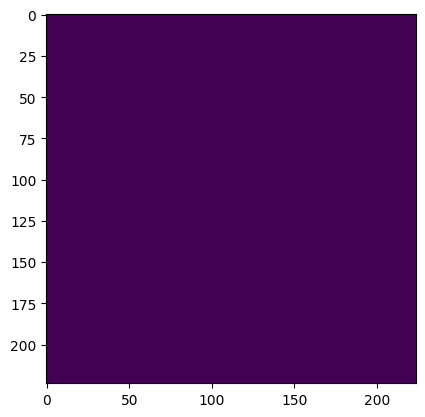

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# # 학습된 모델 불러오기
# unet_pp_model = tf.keras.models.load_model(
#     'model1_unet_pp.h5',
#     custom_objects={'dice_metric_loss': bce_dice_loss})

image_path=f'polyp_segmentation/test/images/10.bmp'
origin_img = imread(image_path)
data = {"image":origin_img}
processed = test_preproc(**data)
# 모델에 이미지 전달하여 예측 수행
input_image = np.expand_dims(processed["image"] / 255, axis=0)  # 배치 차원 추가
prediction1, prediction2, prediction3, prediction4 = unet_pp_model.predict(input_image)
predictions = (prediction1 + prediction2 + prediction3 + prediction4) / 4

# 예측 결과 후처리
binary_mask = predictions[0] > 0.5  # 이진화
binary_mask = binary_mask.astype(np.uint8) * 255  # 이진 마스크로 변환

# # 이진 마스크를 반투명하게 원본 이미지에 합성
# result = cv2.cvtColor(input_image, cv2.COLOR_RGB2BGR)  # 이미지 색상 공간 변환

# alpha = 0.5  # 반투명 정도 (0.0 ~ 1.0)
# result_with_mask = cv2.addWeighted(result, 1 - alpha, cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR), alpha, 0)

# 예측 결과 확인
plt.imshow(binary_mask)